# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will directly read data from Yahoo finance using pandas!

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*


In [112]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [16]:
import yfinance as yf
import pandas as pd
import datetime as dt

start = dt.datetime(2006, 1, 1)
end = dt.datetime(2016, 1, 1)

BAC = yf.download('BAC', start=start, end=end)
C= yf.download('C', start=start, end=end)
GS=yf.download('GS', start=start, end=end)
JPM=yf.download('JPM', start=start, end=end)
MS=yf.download('MS', start=start, end=end)
WFC=yf.download('WFC', start=start, end=end)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [20]:
WFC

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,31.600000,31.975000,31.195000,31.900000,19.124544,11016400
2006-01-04,31.799999,31.820000,31.365000,31.530001,18.902725,10870000
2006-01-05,31.500000,31.555000,31.309999,31.495001,18.881741,10158000
2006-01-06,31.580000,31.775000,31.385000,31.680000,18.992657,8403800
2006-01-09,31.674999,31.825001,31.555000,31.674999,18.989656,5619600
...,...,...,...,...,...,...
2015-12-24,54.970001,55.090000,54.709999,54.820000,42.802166,4999400
2015-12-28,54.549999,54.779999,54.169998,54.680000,42.692852,8288800
2015-12-29,55.110001,55.349998,54.990002,55.290001,43.169125,7894900


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [22]:
ticks=['BAC','C','GS','JPM','MS','WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [48]:
bank_stocks=pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=ticks)
bank_stocks.head()

BAC                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2006-01-03  46.919998  47.180000  46.150002  47.080002  31.750570  16296700   
2006-01-04  47.000000  47.240002  46.450001  46.580002  31.413363  17757900   
2006-01-05  46.580002  46.830002  46.320000  46.639999  31.453835  14970700   
2006-01-06  46.799999  46.910000  46.349998  46.570000  31.406622  12599800   
2006-01-09  46.720001  46.970001  46.360001  46.599998  31.426853  15619400   

                     C                                      ...         MS  \
                  Open        High         Low       Close  ...        Low   
Date                                                        ...              
2006-01-03  490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04  488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05  484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06  488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09  486.000000  487.399994  483.000000  483.899994  ...  58.619999   

                                                 WFC                        \
                Close  Adj Close   Volume       Open       High        Low   
Date                                                                         
2006-01-03  58.310001  32.955109  5377000  31.600000  31.975000  31.195000   
2006-01-04  58.349998  32.977703  7977800  31.799999  31.820000  31.365000   
2006-01-05  58.509998  33.068127  5778000  31.500000  31.555000  31.309999   
2006-01-06  58.570000  33.102055  6889800  31.580000  31.775000  31.385000   
2006-01-09  59.189999  33.452454  4144500  31.674999  31.825001  31.555000   

                                            
                Close  Adj Close    Volume  
Date                                        
2006-01-03  31.900000  19.124544  11016400  
2006-01-04  31.530001  18.902725  10870000  
2006-01-05  31.495001  18.881741  10158000  
2006-01-06  31.680000  18.992657   8403800  
2006-01-09  31.674999  18.989656   5619600  

[5 rows x 36 columns]

** Set the column name levels:**

In [50]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [52]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  31.750570  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  31.413363  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  31.453835  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  31.406622  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  31.426853  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  32.955109  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  32.977703  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  33.068127  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  33.102055  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  33.452454  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.124544  11016400  
2006-01-04   31.530001  18.902725  10870000  
2006-01-05   31.495001  18.881741  10158000  
2006-01-06   31.680000  18.992657   8403800  
2006-01-09   31.674999  18.989656   5619600  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit!

** What is the max Close price for each bank's stock throughout the time period?**

In [88]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [106]:
returns= pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [108]:
for tick in ticks:
    returns[tick+'_Returns']=bank_stocks[tick]['Close'].pct_change() 
returns.head()

,BAC_Returns,C_Returns,GS_Returns,JPM_Returns,MS_Returns,WFC_Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

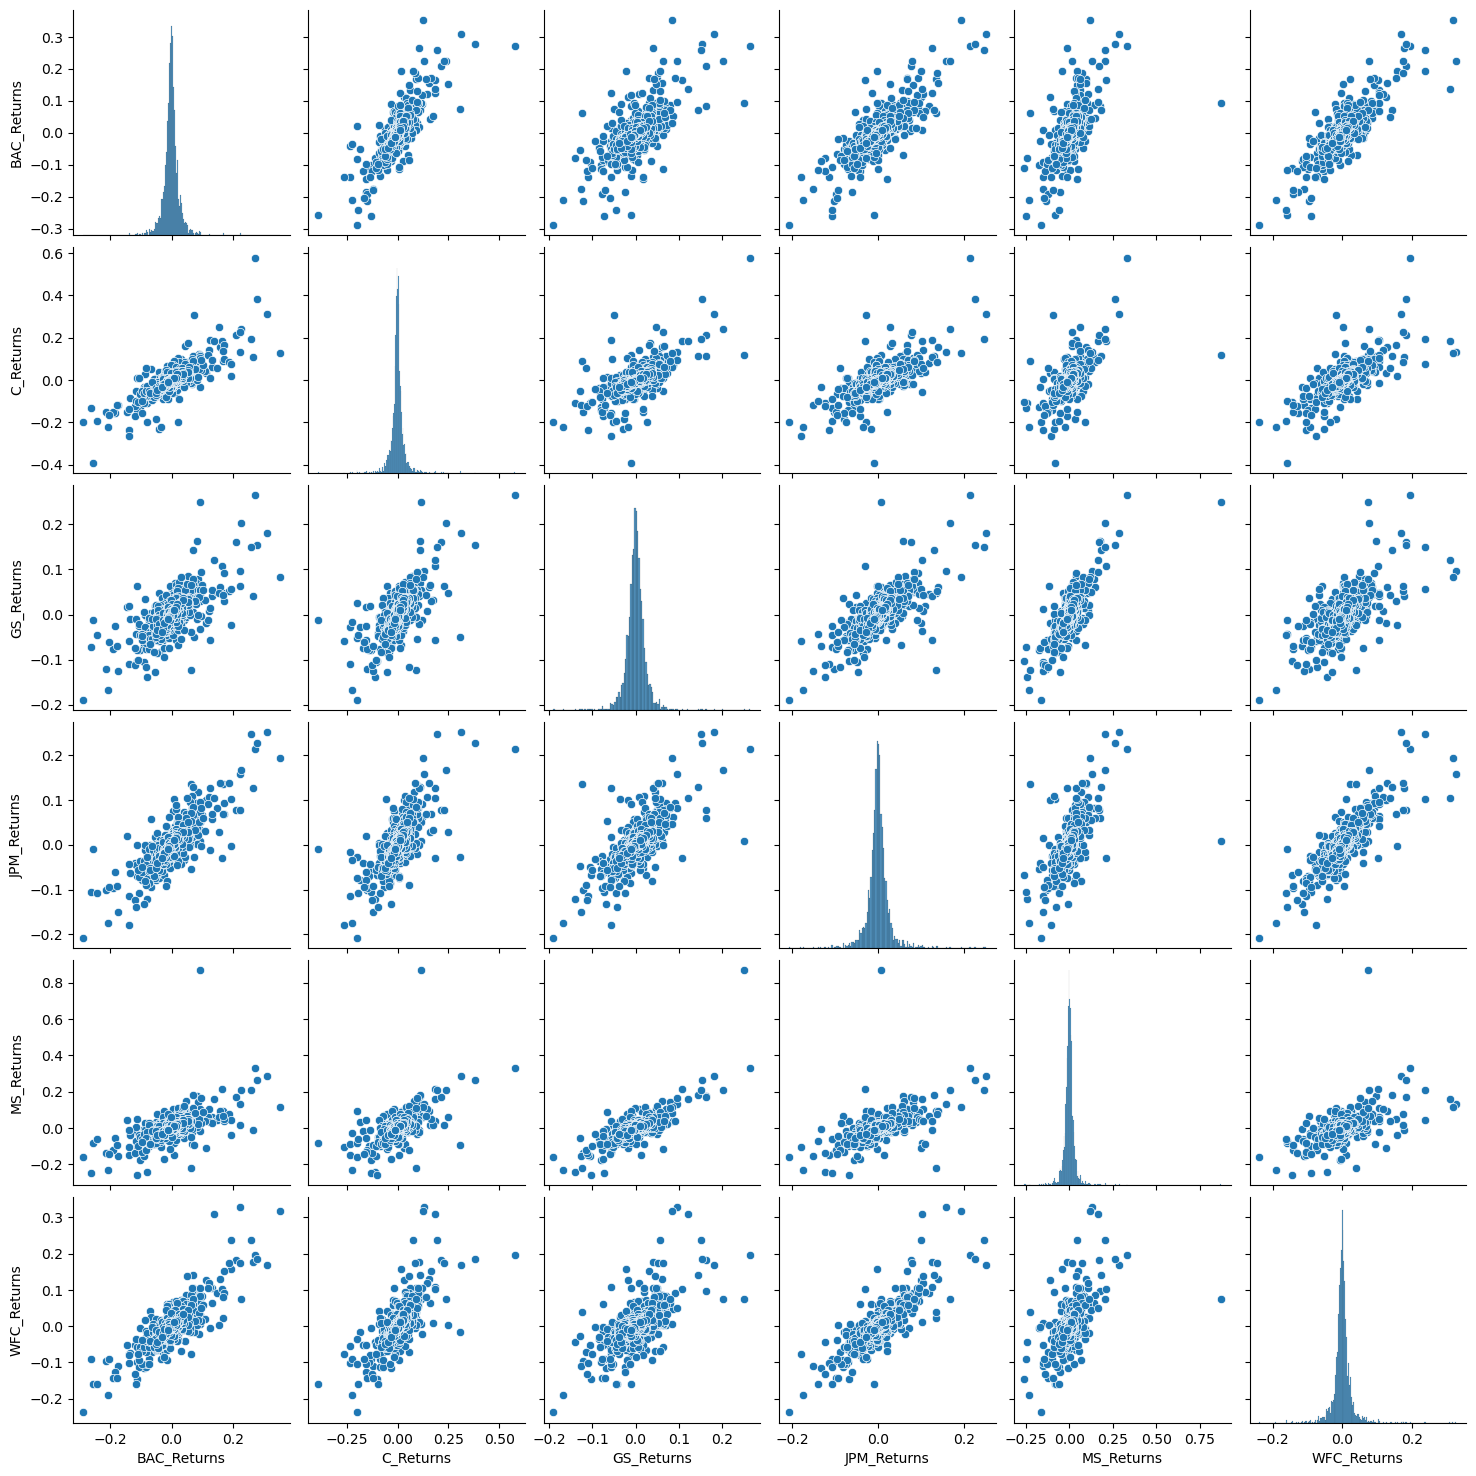

In [116]:
sns.pairplot(returns[1:])

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [118]:
returns.idxmin()

BAC_Returns   2009-01-20
C_Returns     2009-02-27
GS_Returns    2009-01-20
JPM_Returns   2009-01-20
MS_Returns    2008-10-09
WFC_Returns   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

In [120]:
returns.idxmax()

BAC_Returns   2009-04-09
C_Returns     2008-11-24
GS_Returns    2008-11-24
JPM_Returns   2009-01-21
MS_Returns    2008-10-13
WFC_Returns   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [122]:
returns.std()

BAC_Returns    0.036647
C_Returns      0.038672
GS_Returns     0.025390
JPM_Returns    0.027667
MS_Returns     0.037819
WFC_Returns    0.030238
dtype: float64

In [132]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC_Returns    0.016163
C_Returns      0.015289
GS_Returns     0.014046
JPM_Returns    0.014017
MS_Returns     0.016249
WFC_Returns    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\Phantom\AppData\Local\Temp\ipykernel_14608\4153830779.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS_Returns'],bins=50,color='green')


<Axes: xlabel='MS_Returns', ylabel='Density'>

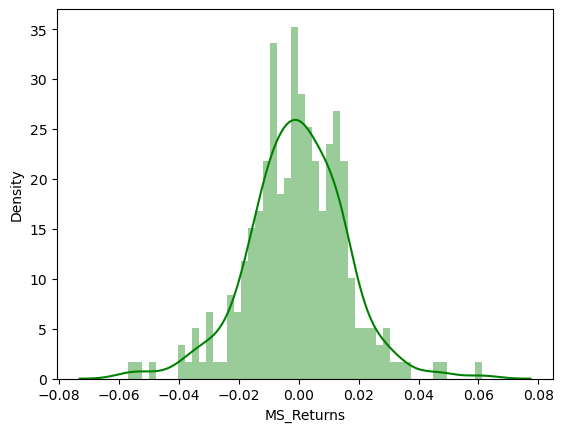

In [150]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS_Returns'],bins=50,color='green')

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

C:\Users\Phantom\AppData\Local\Temp\ipykernel_14608\2163641661.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C_Returns'],bins=50,color='red')


<Axes: xlabel='C_Returns', ylabel='Density'>

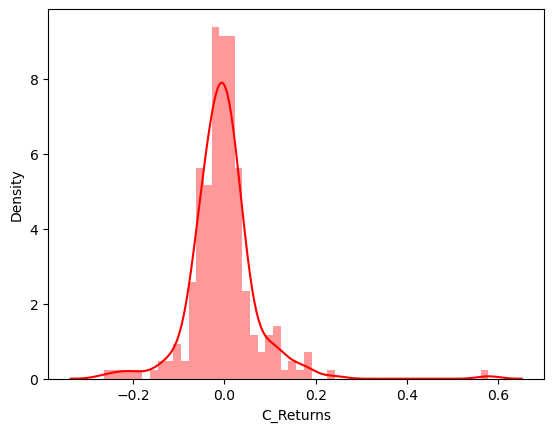

In [158]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C_Returns'],bins=50,color='red')

____
# More Visualization

### Imports

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time.**

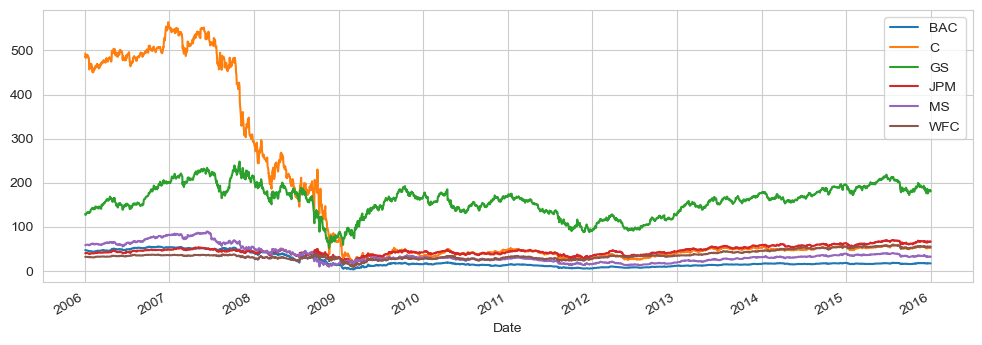

In [167]:
for tick in ticks:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()

<Axes: xlabel='Date'>

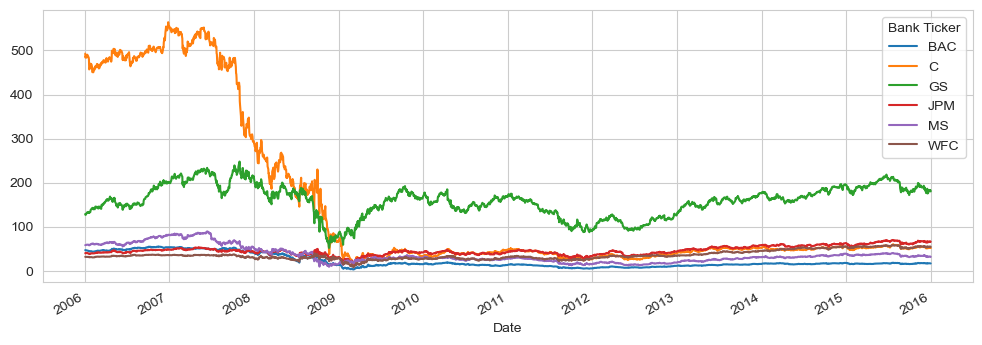

In [175]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,4))

C:\Users\Phantom\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



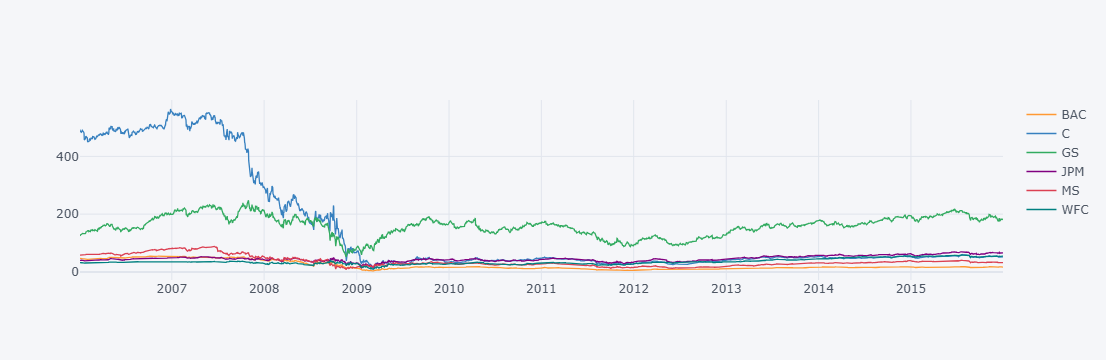

In [177]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

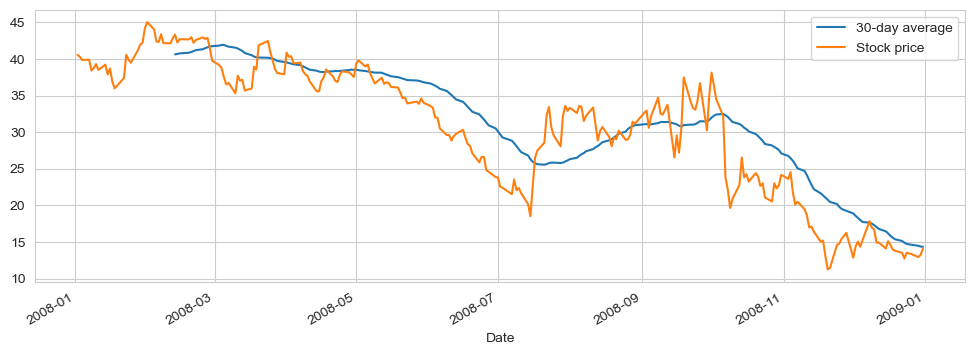

In [195]:
plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30-day average')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='Stock price')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

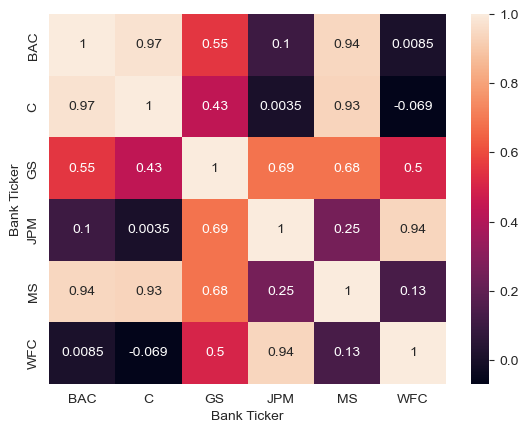

In [199]:
bc=bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
sns.heatmap(bc,annot=True)

**Use seaborn's clustermap to cluster the correlations together:**

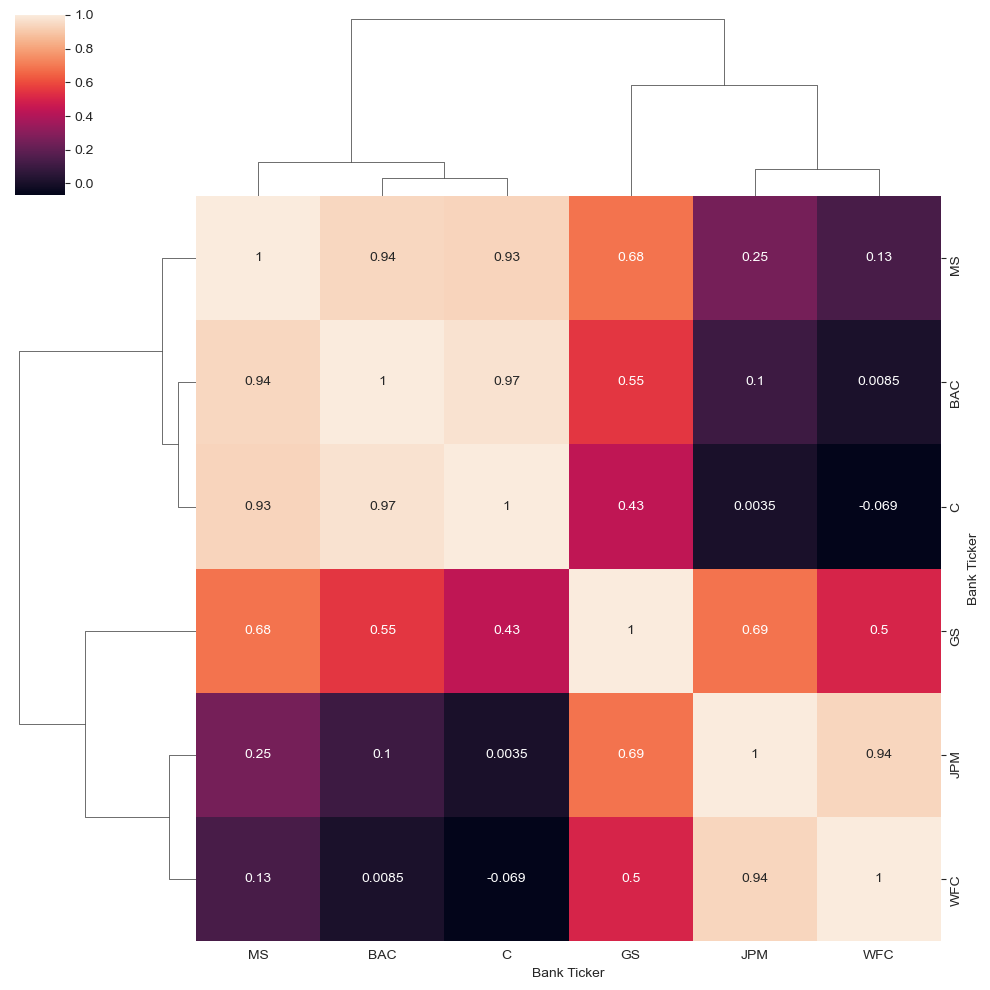

In [220]:
sns.clustermap(bc,annot=True)

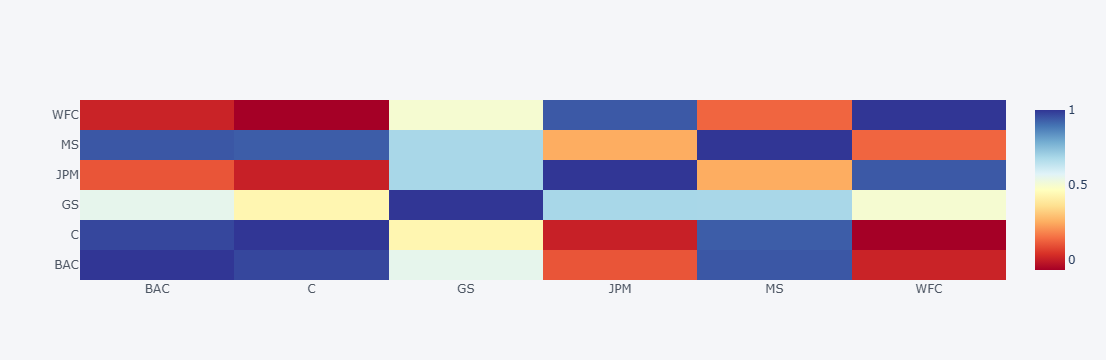

In [258]:
bc.iplot(kind='heatmap',colorscale='rdylbu')

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

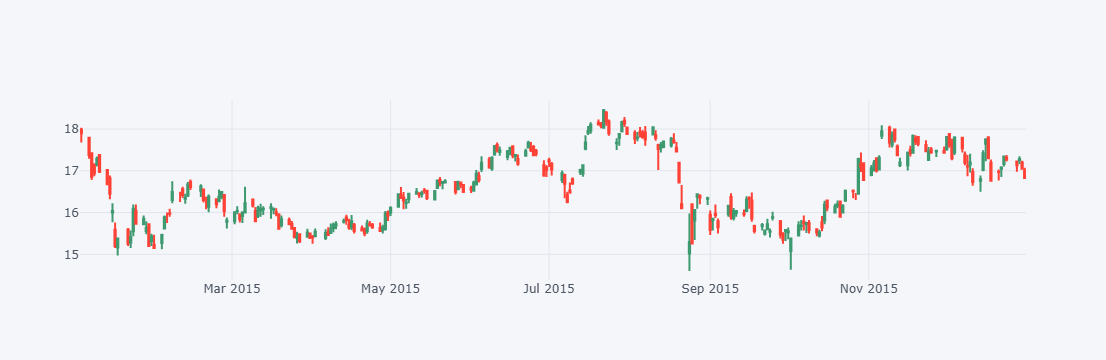

In [260]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

C:\Users\Phantom\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

C:\Users\Phantom\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



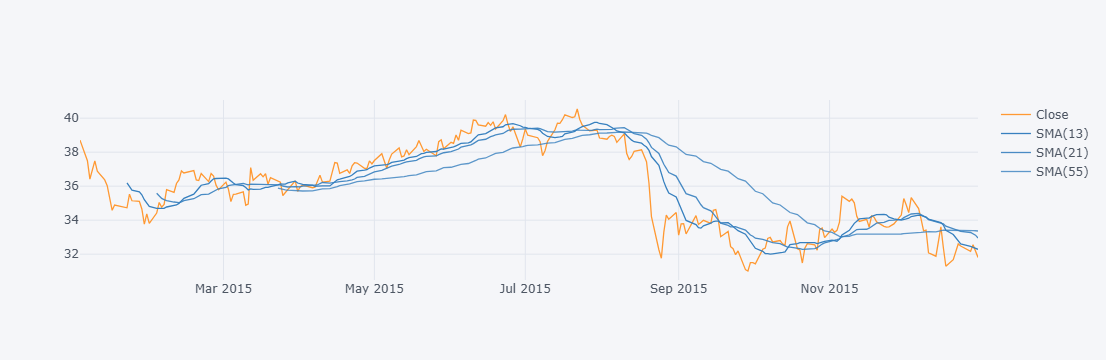

In [262]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

C:\Users\Phantom\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

C:\Users\Phantom\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



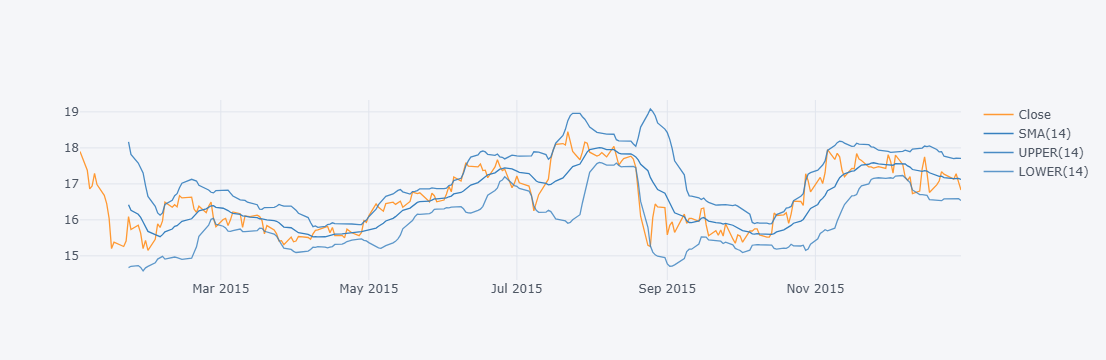

In [264]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

# End